In [1]:
import scipy.io
import numpy
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from multiprocessing import Pool
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# Lineplots first!
## Odd is Accuracy Even is Speed

## 0 1 are sudden

In [2]:
def lineplots(data, block, first, last):
    traj = scipy.io.loadmat('data/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))

    for i in range(first,last):
        plt.plot(traj['x'][0][i][0], traj['y'][0][i][0])


In [3]:
interact(lineplots, data = widgets.ToggleButtons(options = range(1000, 1060)), block = widgets.IntSlider(max = 11, min = 0, value = 0, step = 1),
        first = widgets.IntSlider(max = 63, min = 0, value = 0, step = 1), last = widgets.IntSlider(max = 64, min = 1, value = 1, step = 1))

interactive(children=(ToggleButtons(description='data', options=(1000, 1001, 1002, 1003, 1004, 1005, 1006, 100…

<function __main__.lineplots(data, block, first, last)>

## Error Vs Time plots

Divide Trajectories by 5. Calculate mean and standard deviation of difference between ideal and actual trajectories (both divided by 5) for all 64 trajectories in a block. 
From the movement time, calculate how long it took to finish each of these 5 trajectories. Calculate mean and standard deviation across 64 trials. 

This might as well just be equal to the mean and standard deviation of the **number** of points in each of those five quantiles for all trajectories.



# Error Calculation
Takes in a trajectory loaded from the mat file and calculates error by comparing minimum distance from x and y coordinates of the actual trajectory to the ideal trajectory

In [2]:
#square_coord = scipy.io.loadmat('data/pilot/pilot_1/squares/coordinates/squares3.mat')
#traj = scipy.io.loadmat('data/pilot/pilot_1/actual_trajectories/trajectories3.mat')
#def calc_error(traj, square_coord):
# The version above uses square coordinates
def calc_error(traj):    
    error = list()
    for j in range(64):
        traj_dist = list()
        trajx, trajy = traj['x'][0][j][0], traj['y'][0][j][0]
        #end_pointx, end_pointy  = square_coord['squareX'][0][j], square_coord['squareY'][0][j]
        end_pointx, end_pointy  = traj['x'][0][j][0][-1], traj['y'][0][j][0][-1]

        xline = numpy.linspace(0, end_pointx, 500)
        yline = numpy.linspace(0, end_pointy, 500)

        for i in range(len(trajx)):
            xdist = min(numpy.absolute(xline-trajx[i]))
            ydist = min(numpy.absolute(yline-trajy[i]))
            dist = numpy.sqrt(xdist**2 + ydist**2)
            traj_dist.append(dist)
        error.append(traj_dist)
    return error
#dist = numpy.linalg.norm(numpy.cross(p2-p1, p1-p3))/numpy.linalg.norm(p2-p1)

In [ ]:
#traj['x'][0][0][0][-1]

In [ ]:
#calc_error(traj, square_coord)

Participant 1 Gradual Change Accuracy emphasis

Participant 2 Sudden change Accuracy emphasis

Participant 3 Gradual change Speed emphasis

# Time quintiles:
X axis is cummulative sum of the number of samples in the trajectory, averaged across all trajectories. 
Y axis is the mean of error in that time quantile, averaged across all trajectories


In [ ]:
def errorvstime(data, block, num_trajectories):
    traj = scipy.io.loadmat('data/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/data{data}/ideal_trajectories/trajectories{block}.mat'.format(block = str(block), data=str(data)))
    #squares = scipy.io.loadmat('data/participants/data{data}/squares/coordinates/squares{block}.mat'.format(block=str(block), data=str(data)))
    #xdiff = (ideal_traj['idealXs'] - traj['x'])
    #ydiff = (ideal_traj['idealYs'] - traj['y'])
    error = calc_error(traj)[:num_trajectories]
    #error = xdiff**2+ydiff**2
    #print (error)
    error_means = numpy.zeros((num_trajectories, 5))
    for i in range(num_trajectories):
        n = len(error[i])
        for j in range(5):
            error_means[i, j] = numpy.mean(error[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
#            error_means[i, j] = numpy.median(error[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
         #error_means[i, ] = error_means[i, ]/max(error_means[i,])

    
    time_means = numpy.zeros((num_trajectories, 5))

    for i in range(num_trajectories):
        n = len(error[i])
        for j in range(5):
            time_means[i, j] = len(error[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
    times = numpy.cumsum(numpy.mean(time_means, axis = 0))
    plt.errorbar(times, numpy.mean(error_means, axis = 0), xerr = stat.sem(time_means, axis = 0), yerr = stat.sem(error_means, axis = 0))
    plt.ylabel('Error')
    plt.xlabel('Time')
    plt.xlim(0, 100)
    plt.ylim(-20, 70)
    return times, numpy.mean(error_means, axis = 0)

Calculate error vs time for each block collapsed across participants.

In [ ]:
times = numpy.zeros((60, 5))
errors = numpy.zeros((60, 5))
for i in range(1000, 1059):
    temp = errorvstime(i, 11, 32)
    times[i-1000] = temp[0]
    errors[i-1000] = temp[1] 
    #print (i)

In [ ]:
times_speed_sudden = numpy.zeros((60, 5))
times_speed_gradual = numpy.zeros((60, 5))
times_accuracy_sudden = numpy.zeros((60, 5))
times_accuracy_gradual = numpy.zeros((60, 5))
errors_speed_sudden = numpy.zeros((60, 5))
errors_speed_gradual = numpy.zeros((60, 5))
errors_accuracy_sudden = numpy.zeros((60, 5))
errors_accuracy_gradual = numpy.zeros((60, 5))
for i in range(len(times)):
    if i%4 == 0:
        times_speed_sudden[i] = times[i]
        errors_speed_sudden[i] = errors[i]
    elif i%4 == 1:
        times_accuracy_sudden[i] = times[i]
        errors_accuracy_sudden[i] = errors[i]
    elif i%4 == 2:
        times_speed_gradual[i] = times[i]
        errors_speed_gradual[i] = errors[i]
    elif i%4 == 3:
        times_accuracy_gradual[i] = times[i]
        errors_accuracy_gradual[i] = errors[i]
       

In [ ]:
times_speed_gradual = numpy.reshape(times_speed_gradual[numpy.nonzero(times_speed_gradual)], (int(len(times_speed_gradual[numpy.nonzero(times_speed_gradual)])/5), 5))
errors_speed_gradual = numpy.reshape(errors_speed_gradual[numpy.nonzero(errors_speed_gradual)], (int(len(errors_speed_gradual[numpy.nonzero(errors_speed_gradual)])/5), 5))
times_speed_sudden = numpy.reshape(times_speed_sudden[numpy.nonzero(times_speed_sudden)], (int(len(times_speed_sudden[numpy.nonzero(times_speed_sudden)])/5), 5))
errors_speed_sudden = numpy.reshape(errors_speed_sudden[numpy.nonzero(errors_speed_sudden)], (int(len(errors_speed_sudden[numpy.nonzero(errors_speed_sudden)])/5), 5))
times_accuracy_gradual = numpy.reshape(times_accuracy_gradual[numpy.nonzero(times_accuracy_gradual)], (int(len(times_accuracy_gradual[numpy.nonzero(times_accuracy_gradual)])/5), 5))
errors_accuracy_gradual = numpy.reshape(errors_accuracy_gradual[numpy.nonzero(errors_accuracy_gradual)], (int(len(errors_accuracy_gradual[numpy.nonzero(errors_accuracy_gradual)])/5), 5))
times_accuracy_sudden = numpy.reshape(times_accuracy_sudden[numpy.nonzero(times_accuracy_sudden)], (int(len(times_accuracy_sudden[numpy.nonzero(times_accuracy_sudden)])/5), 5))
errors_accuracy_sudden = numpy.reshape(errors_accuracy_sudden[numpy.nonzero(errors_accuracy_sudden)], (int(len(errors_accuracy_sudden[numpy.nonzero(errors_accuracy_sudden)])/5), 5))


In [ ]:
times_speed_sudden

In [ ]:
#numpy.mean(times_accuracy_gradual, axis = 0)
#numpy.nanmean(errors_speed_sudden, axis = 0)
#stat.sem(times_accuracy_gradual, axis = 0)
#numpy.nanstd(errors_accuracy_gradual, axis = 0)/numpy.sqrt(errors_accuracy_gradual)
#numpy.nanstd(errors_accuracy_gradual)

numpy.shape(numpy.nonzero(times_accuracy_sudden))

In [ ]:
fig,(ax1)=plt.subplots(1,1)
ax1.errorbar(numpy.nanmean(times_speed_gradual, axis = 0), numpy.nanmean(errors_speed_gradual, axis = 0), xerr=stat.sem(times_speed_gradual, axis = 0), yerr=numpy.nanstd(errors_speed_gradual, axis = 0)/numpy.sqrt(len(errors_speed_gradual)), label = "speed_gradual")
ax1.errorbar(numpy.nanmean(times_speed_sudden, axis = 0), numpy.nanmean(errors_speed_sudden, axis = 0), xerr=stat.sem(times_speed_sudden, axis = 0), yerr=numpy.nanstd(errors_speed_sudden, axis = 0)/numpy.sqrt(len(errors_speed_sudden)), label = "speed_sudden")
ax1.errorbar(numpy.nanmean(times_accuracy_gradual, axis = 0), numpy.nanmean(errors_accuracy_gradual, axis = 0), xerr=stat.sem(times_accuracy_gradual, axis = 0), yerr=numpy.nanstd(errors_accuracy_gradual, axis = 0)/numpy.sqrt(len(errors_accuracy_gradual)), label = "accuracy_gradual")
ax1.errorbar(numpy.nanmean(times_accuracy_sudden, axis = 0), numpy.nanmean(errors_accuracy_sudden, axis = 0), xerr=stat.sem(times_accuracy_sudden, axis = 0), yerr=numpy.nanstd(errors_accuracy_sudden, axis = 0)/numpy.sqrt(len(errors_accuracy_sudden)), label = "accuracy_sudden")
ax1.legend()
plt.xlabel('Mean time point in quintile')
plt.ylabel('Error')


# Time Bar plots

In [ ]:
pos = [0, 1, 2, 3]
handles = plt.bar(pos, [numpy.median(times_speed_gradual), numpy.median(times_accuracy_gradual), numpy.median(times_speed_sudden), numpy.median(times_accuracy_sudden)], yerr = [numpy.mean(stat.sem(times_speed_gradual)), numpy.mean(stat.sem(times_accuracy_gradual)), numpy.mean(stat.sem(times_speed_sudden)), numpy.mean(stat.sem(times_accuracy_sudden))], color = ['Blue', 'Green', 'Blue', 'Green'], capsize = 3)
plt.xticks([0.5, 2.5], ['Gradual', 'Sudden'])
plt.ylabel('Times')
plt.xlabel('Condition')

plt.legend([handles[0], handles[1]], ['Speed', 'Accuracy'])
#handles[0]

In [ ]:
numpy.ravel(times_accuracy_gradual)

In [ ]:
pos = [1, 2]
yerr = [numpy.mean(stat.sem(numpy.concatenate((times_speed_gradual, times_accuracy_gradual)))), numpy.mean(stat.sem(numpy.concatenate((times_speed_sudden, times_accuracy_sudden))))]
plt.bar(pos, [numpy.mean(numpy.concatenate((times_speed_gradual, times_accuracy_gradual))), numpy.mean(numpy.concatenate((times_speed_sudden, times_accuracy_sudden)))], yerr = yerr, color = 'blue')
plt.xticks(pos, ['Gradual', 'Sudden'])
plt.ylabel('Times')
plt.xlabel('Condition')


In [ ]:
pos = [0, 1]
yerr = [numpy.mean(stat.sem(numpy.concatenate((times_speed_gradual, times_speed_sudden)))), numpy.mean(stat.sem(numpy.concatenate((times_accuracy_gradual, times_accuracy_sudden))))]
plt.bar(pos, [numpy.mean(numpy.concatenate((times_speed_gradual, times_speed_sudden))), numpy.mean(numpy.concatenate((times_accuracy_gradual, times_accuracy_sudden)))], yerr = yerr)
plt.xticks(pos, ['Speed', 'Accuracy'])
plt.ylabel('Times')
plt.xlabel('Condition')


# Error Bar plots

In [ ]:
errors_accuracy_gradual

In [ ]:
#path = 'C:/Users/Tejas/OneDrive/Research/Conferences and Papers/Psychonomics 2019/errors/'
#plt.rcParams[('figure.figsize')] = [8, 6]
pos = [0, 1, 2, 3]
y = [numpy.nanmean(errors_accuracy_sudden),
    numpy.nanmean(errors_speed_sudden),
    numpy.nanmean(errors_accuracy_gradual),
     numpy.nanmean(errors_speed_gradual)
    ]
y_sem = [numpy.mean(stat.sem(times_accuracy_sudden)),
        numpy.mean(stat.sem(times_speed_sudden)),
        numpy.mean(stat.sem(times_accuracy_gradual)),
        numpy.mean(stat.sem(times_speed_gradual))]
#handles = plt.bar(pos, yerr = [numpy.mean(stat.sem(times_speed_gradual)), numpy.nanmean(stat.sem(errors_accuracy_gradual)), numpy.nanmean(stat.sem(times_speed_sudden)), numpy.mean(stat.sem(times_accuracy_sudden))], color = ['Blue', 'Green', 'Blue', 'Green'])
plt.bar(0, y[0], yerr = y_sem[0], capsize = 3, color = 'Blue', alpha = 1)
plt.bar(2, y[1], yerr = y_sem[1], capsize = 3, color = 'Blue', alpha = 0.5)
plt.bar(1, y[2], yerr = y_sem[2], capsize = 3, color = 'Green', alpha = 1)
plt.bar(3, y[3], yerr = y_sem[3], capsize = 3, color = 'Green', alpha = 0.5)

plt.xticks([0, 2, 1, 3], ['Sudden \n Accuracy', 'Sudden \n Speed', 'Gradual \n Accuracy', 'Gradual \nSpeed'], rotation = 'vertical')
plt.ylabel('RMSE')
plt.xlabel('Condition')
#plt.legend([handles[0], handles[1]], ['Speed', 'Accuracy'])
plt.title('Error')
#plt.tight_layout()
#plt.savefig(path+'transfer.png', dpi = 300)


In [ ]:
yerr = [numpy.nanmean(stat.sem(numpy.concatenate((errors_speed_gradual, errors_speed_sudden)))), numpy.nanmean(stat.sem(numpy.concatenate((errors_accuracy_gradual, errors_accuracy_sudden))))]
plt.bar(['Speed', 'Accuracy'], [numpy.nanmean(numpy.concatenate((errors_speed_gradual, errors_speed_sudden))), numpy.nanmean(numpy.concatenate((errors_accuracy_gradual, errors_accuracy_sudden)))], yerr = yerr)
plt.xlabel('Emphasis')
plt.ylabel('Error')
print (yerr)

In [ ]:
yerr = [numpy.nanmean(stat.sem(numpy.concatenate((errors_speed_gradual, errors_accuracy_gradual)))), numpy.nanmean(stat.sem(numpy.concatenate((errors_speed_sudden, errors_accuracy_sudden))))]
plt.bar(['Gradual', 'Sudden'], [numpy.nanmean(numpy.concatenate((errors_speed_gradual, errors_accuracy_gradual))), numpy.nanmean(numpy.concatenate((errors_speed_sudden, errors_accuracy_sudden)))], yerr = yerr)
plt.xlabel('Condition')
plt.ylabel('Error')
print (yerr)

In [ ]:
interact(errorvstime, data = widgets.ToggleButtons(options = range(1,27)), 
                      block = widgets.IntSlider(max = 11, min = 0, value = 0, step = 1))

In [ ]:
aesthetics = numpy.zeros((4, 3, 15))

In [ ]:
aesthetics[0, 0, :] = numpy.array([9, 4, 2, 10, 9, 8, 7, 5, 7, 9, 10, 8, 9, 2, 6])
aesthetics[0, 1, :] = numpy.array([10, 2, 1, 5, 5, 2, 4, 1, 3, 1, 9, 6, 2, 1, 4])
aesthetics[0, 2, :] = numpy.array([10, 7, 1, 4 ,9, 4, 3, 2, 6, 1, 1, 2, 1, 1, 7])
aesthetics[1, 0, :] = numpy.array([10, 4, 10, 10, 3, 8, 7, 10, 6, 2, 2, 10, 5, 1, 1])
aesthetics[1, 1, :] = numpy.array([2, 2, 1, 3, 1, 3, 2, 4, 2, 1, 1, 5, 1, 1, 1])
aesthetics[1, 2, :] = numpy.array([7, 1, 1, 8, 1, 2, 3, 2, 4, 2, 1, 5, 2, 1, 1])
aesthetics[2, 0, :] = numpy.array([1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 2])
aesthetics[2, 1, :] = numpy.array([3, 2, 4, 4, 3, 2, 3, 5, 4, 4, 6, 3, 2, 3, 2])
aesthetics[2, 2, :] = numpy.array([7, 3, 6, 7, 8, 5, 3, 4, 5, 9, 1, 4, 7, 4, 5])
aesthetics[3, 0, :] = numpy.array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1])
aesthetics[3, 1, :] = numpy.array([3, 1, 2, 1, 4, 3, 2, 2, 2, 1, 2, 2, 1, 2, 1 ])
aesthetics[3, 2, :] = numpy.array([3, 4, 2, 2, 4, 2, 5, 4, 1, 5, 2, 6, 4, 2, 2])

In [ ]:
plt.bar(range(1, 11), numpy.bincount(aesthetics[0, 0, :]))

In [ ]:
from collections import Counter

In [ ]:
recounted = Counter(aesthetics[0, 0, :])

In [ ]:
numpy.histogram(aesthetics)

In [ ]:
for i in range(4):
    for j in range(3):
        plt.hist(aesthetics[i, j, :])

Boundary is how good my plan is. Boundary affected by speed/accuracy.

Drift rate affected by gradual vs sudden.

In [ ]:
def errors(data, block):
    traj = scipy.io.loadmat('data/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/data{data}/ideal_trajectories/trajectories{block}.mat'.format(block = str(block), data=str(data)))
    #print (traj)
    #squares = scipy.io.loadmat('data/participants/data{data}/squares/coordinates/squares{block}.mat'.format(block=str(block), data=str(data)))
    #xdiff = (ideal_traj['idealXs'] - traj['x'])
    #ydiff = (ideal_traj['idealYs'] - traj['y'])
    error = calc_error(traj)
    return numpy.array(error)

In [ ]:
temp = errors(1000, 1)

In [ ]:
plt.hist(temp[0][])

In [ ]:
def all_errors(num_participants, num_blocks, num_trajectories):
    error_sum = numpy.zeros((num_participants, num_blocks, num_trajectories))
    error_std = numpy.zeros((num_participants, num_blocks, num_trajectories))
    for participant in range(num_participants):
        for block in range(num_blocks):
            temp = errors(participant+1000, block)
            for trial in range(num_trajectories):
                error_sum[participant, block, trial] = numpy.nanmean(temp[trial])
                error_std[participant, block, trial] = stat.sem(temp[trial])
        print (participant)
            #error_sum1.append(numpy.mean(numpy.sum(errors(1, block), axis=0)))
            #error_std1.append(numpy.std(numpy.sum(errors(1, block), axis=0)))
            #error_sum2.append(numpy.mean(numpy.sum(errors(2, block), axis=0)))
            #error_std2.append(numpy.std(numpy.sum(errors(2, block), axis=0)))
            #error_sum3.append(numpy.mean(numpy.sum(errors(3, block), axis=0)))
            #error_std3.append(numpy.std(numpy.sum(errors(3, block), axis=0)))    
    return error_sum, error_std

In [ ]:
error_sum, error_std = all_errors(60, 12, 64)

In [ ]:
plt.plot(numpy.mean((error_sum[1:-1:2]), axis = 0), 'k-')
plt.plot(numpy.mean((error_sum[2:-1:2]), axis = 0), 'k-')

plot1 = plt.fill_between(range(12), numpy.mean(error_sum[1:-1:2], axis = 0) + stat.sem(error_sum[1:-1:2]), numpy.mean(error_sum[1:-1:2], axis = 0) - stat.sem(error_sum[1:-1:2]), alpha = 0.5)
plot2 = plt.fill_between(range(12), numpy.mean(error_sum[2:-1:2], axis = 0) + stat.sem(error_sum[2:-1:2]), numpy.mean(error_sum[2:-1:2], axis = 0) - stat.sem(error_sum[2:-1:2]), alpha = 0.5)
plt.legend((plot1, plot2), ("Accuracy", "Speed"))
#error_sum[3]
#error_sum1
plt.xlabel('Block')
plt.ylabel('Error')

In [ ]:
def plot_error_means(errors, path):
    #plt.rcParams[('figure.figsize')] = [8, 6]

    mean_errors = numpy.mean(error_sum, axis =2)
    plt.errorbar(range(1, 11), numpy.mean(numpy.mean(error_sum, axis = 2)[3::4], axis = 0)[1:-1], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.mean(error_sum, axis = 2)[3::4], axis = 0)[0], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[3::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.mean(error_sum, axis = 2)[3::4], axis = 0)[11], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[3::4], axis = 0)[11], capsize=3, fmt = 'd', fillstyle = 'none', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '14 Participants')
    plt.ylabel('RMSE')
    plt.xlabel('Block')
    plt.title('Gradual Accuracy')
    plt.xticks(range(12), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])

    #y_lim_max = numpy.max((mean_errors)) + 5
    y_lim_max = 100
    plt.ylim((0, y_lim_max))
#    print(max(np.mean(quantiles[3::4][:, :, 3], axis = 0)[1:-1]) + 0.7)
    #plt.tight_layout()
    #plt.savefig(path+'learning_GA.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.mean(error_sum, axis = 2)[2::4], axis = 0)[1:-1], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[2::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.mean(error_sum, axis = 2)[2::4], axis = 0)[0], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[2::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.mean(error_sum, axis = 2)[2::4], axis = 0)[11], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[2::4], axis = 0)[11], capsize=3, fmt = 'd', fillstyle = 'full', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '15 Participants')
    plt.ylabel('RMSE')
    plt.xlabel('Block')
    plt.xticks(range(12), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.title('Gradual Speed')
    plt.ylim(2, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_GS.png', dpi = 600)
    plt.show()
    #y_lim_max = 2200

    plt.errorbar(range(1, 11), numpy.mean(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[1:-1], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[0], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[11], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[1::4], axis = 0)[11], capsize=3, fmt = 's', fillstyle = 'none', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '15 Participants')
    plt.ylabel('RMSE')
    plt.xlabel('Block')
    plt.xticks(range(12), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.title('Sudden Accuracy')
    #y_lim_max = 10000

    plt.ylim(2, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_SA.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.mean(error_sum, axis = 2)[4::4], axis = 0)[1:-1], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[4::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.mean(error_sum, axis = 2)[4::4], axis = 0)[0], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[4::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.mean(error_sum, axis = 2)[4::4], axis = 0)[11], yerr = stat.sem(numpy.mean(error_sum, axis = 2)[4::4], axis = 0)[11], capsize=3, fmt = 's', fillstyle = 'full', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '14 Participants')
    plt.xticks(range(12), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.ylabel('RMSE')
    plt.xlabel('Block')
    plt.title('Sudden Speed')
#    y_lim_max = 2600
    plt.ylim(2, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_SS.png', dpi = 600)
    plt.show()


In [ ]:
plot_error_means(error_sum, "C:/Users/Tejas/OneDrive/Research/Conferences and Papers/Psychonomics 2019/errors/")

In [ ]:
#numpy.mean(numpy.mean(error_sum[1::4], axis = 2), axis = 0)
#stat.sem(numpy.mean(error_sum[1::4], axis = 2), axis = 0)
def plot_error_means_transfer(errors, text):
#    quantiles = get_quantile(total_times)
    xpos = [0, 1, 2, 3, 4]
    y = numpy.array([numpy.mean(numpy.median(error_sum[1::4], axis = 2), axis = 0)[11],
                  numpy.mean(numpy.mean(error_sum[0::4], axis = 2), axis = 0)[11],
                  numpy.mean(numpy.mean(error_sum[3::4], axis = 2), axis = 0)[11],
                  numpy.mean(numpy.mean(error_sum[2::4], axis = 2), axis = 0)[11]] 
                  )
    y_sem = numpy.array([stat.sem(numpy.mean(error_sum[1::4], axis = 2), axis = 0)[11], 
                    stat.sem(numpy.mean(error_sum[0::4], axis = 2), axis = 0)[11],
                    stat.sem(numpy.mean(error_sum[3::4], axis = 2), axis = 0)[11],
                    stat.sem(numpy.mean(error_sum[2::4], axis = 2), axis = 0)[11]])
    #print (y_sem[0])
    plt.bar(0, y[0], yerr = y_sem[0], capsize = 3, fill = False)
    plt.bar(1, y[1], yerr = y_sem[1], capsize = 3, color = [0.5, 0.5, 0.5])
    plt.bar(2, y[2], yerr = y_sem[2], capsize = 3, hatch = '\\', fill = False)
    plt.bar(3, y[3], yerr = y_sem[3], capsize = 3, color = [0.5, 0.5, 0.5], hatch = '\\')

#    handles = plt.bar(range(4), y, yerr = y_sem, capsize = 3, color = ['Blue', 'Green', 'Blue', 'Green'], alpha = [1, 0.5, 0.5, 1])
    plt.xticks([0, 1, 2, 3], ['Sudden \n Accuracy', 'Sudden \n Speed', 'Gradual \n Accuracy', 'Gradual \nSpeed'], rotation = 'vertical')
    plt.ylabel('Error (RMSE)')
    plt.xlabel('Condition')
    #plt.legend([handles[0], handles[1]], ['Speed', 'Accuracy'])
    plt.ylim((0, 45))
    plt.title(text)
    

#numpy.shape(numpy.mean(error_sum[1::4], axis = 0))

In [ ]:
plot_error_means_transfer(error_sum, 'Errors')

In [ ]:
data = 10
block = 10
num_trials = 2
traj = scipy.io.loadmat('data/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data+1000)))
for trial in range(num_trials):
    trajx, trajy = traj['x'][0][trial][0], traj['y'][0][trial][0]
    diffx, diffy = trajx[1:] - trajx[:-1], trajy[1:] - trajy[:-1]
    #print (diffx, diffy)

In [ ]:
plt.scatter(trajx, trajy)
numpy.sum(numpy.sqrt((numpy.square(diffx, dtype = float) + numpy.square(diffy, dtype = float))))

In [ ]:
#Calculate the actual distance travelled in a trajectory.
def calc_dist_travelled(num_data, num_block, num_trials):
    dist = numpy.zeros((num_data, num_block, num_trials))
    for data in range(num_data):
        for block in range(num_block):
            traj = scipy.io.loadmat('data/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data+1000)))
            for trial in range(num_trials):
                trajx, trajy = traj['x'][0][trial][0], traj['y'][0][trial][0]
                diffx, diffy = trajx[1:] - trajx[:-1], trajy[1:] - trajy[:-1]
                #print (diffx, diffy)
                dist[data][block][trial] = numpy.sum(numpy.sqrt((numpy.square(diffx, dtype = float) + numpy.square(diffy, dtype = float))))
    return dist

In [ ]:
dist = calc_dist_travelled(60, 12, 32)

In [ ]:
def plot_dist_means(distances, path):
    #plt.rcParams[('figure.figsize')] = [8, 6]

    mean_errors = numpy.mean(distances, axis =2)
    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[1:-1], capsize=3)
    #plt.errorbar(0, numpy.mean(numpy.median(distances, axis = 2)[3::4], axis = 0)[0], yerr = stat.sem(numpy.median(distances, axis = 2)[3::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[11], capsize=3, fmt = 's')
    #plt.text(x=5, y = 80, s = '14 Participants')
    plt.ylabel('RMSE')
    plt.xlabel('Block')
    plt.title('Gradual Accuracy')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])

    #y_lim_max = numpy.max((mean_errors)) + 5
    #y_lim_max = 500000
    #plt.ylim((0, y_lim_max))
#    print(max(np.mean(quantiles[3::4][:, :, 3], axis = 0)[1:-1]) + 0.7)
    #plt.tight_layout()
    #plt.savefig(path+'learning_GA.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmedian(distances, axis = 2)[2::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[2::4], axis = 0)[1:-1], capsize=3)
    #plt.errorbar(0, numpy.mean(numpy.median(distances, axis = 2)[2::4], axis = 0)[0], yerr = stat.sem(numpy.median(distances, axis = 2)[2::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.nanmedian(distances, axis = 2)[2::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[2::4], axis = 0)[11], capsize=3, fmt = 's')
    #plt.text(x=5, y = 80, s = '15 Participants')
    plt.ylabel('RMSE')
    plt.xlabel('Block')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.title('Gradual Speed')
    #plt.ylim(-1, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_GS.png', dpi = 600)
    plt.show()
    #y_lim_max = 2200

    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[1:-1], capsize=3)
    #plt.errorbar(0, numpy.mean(numpy.mean(distances, axis = 2)[1::4], axis = 0)[0], yerr = stat.sem(numpy.mean(distances, axis = 2)[1::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[11], capsize=3, fmt = 's')
    #plt.text(x=5, y = 80, s = '15 Participants')
    plt.ylabel('RMSE')
    plt.xlabel('Block')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.title('Sudden Accuracy')
    #y_lim_max = 10000

    #plt.ylim(2, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_SA.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[1:-1], capsize=3)
    #plt.errorbar(0, numpy.mean(numpy.median(distances, axis = 2)[4::4], axis = 0)[0], yerr = stat.sem(numpy.median(distances, axis = 2)[4::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[11], capsize=3, fmt = 's')
    #plt.text(x=5, y = 80, s = '14 Participants')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.ylabel('RMSE')
    plt.xlabel('Block')
    plt.title('Sudden Speed')
#    y_lim_max = 2600
    #plt.ylim(2, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_SS.png', dpi = 600)
    plt.show()


In [ ]:
#plt.plot(numpy.mean(numpy.mean(dist[0::4], axis = 2), axis = 0))
#plt.plot(numpy.mean(numpy.mean(dist[1::4], axis = 2), axis = 0))
#plt.plot(numpy.mean(numpy.mean(dist[2::4], axis = 2), axis = 0))
#plt.plot(numpy.mean(numpy.mean(dist[3::4], axis = 2), axis = 0))
plot_dist_means(dist, '')

In [ ]:
#numpy.mean(numpy.mean(error_sum[1::4], axis = 2), axis = 0)
#stat.sem(numpy.mean(error_sum[1::4], axis = 2), axis = 0)
def plot_dist_means_transfer(distances, text):
#    quantiles = get_quantile(total_times)
    xpos = [0, 1, 2, 3, 4]
    y = numpy.array([numpy.mean(numpy.median(distances[1::4], axis = 2), axis = 0)[11],# - numpy.mean(numpy.median(distances[1::4], axis = 2), axis = 0)[10],
                  numpy.mean(numpy.median(distances[4::4], axis = 2), axis = 0)[11], #- numpy.mean(numpy.median(distances[4::4], axis = 2), axis = 0)[10],
                  numpy.mean(numpy.median(distances[3::4], axis = 2), axis = 0)[11], #- numpy.mean(numpy.median(distances[3::4], axis = 2), axis = 0)[10],
                  numpy.mean(numpy.median(distances[2::4], axis = 2), axis = 0)[11]] #- numpy.mean(numpy.median(distances[2::4], axis = 2), axis = 0)[10]] 
                  )
    y_sem = numpy.array([stat.sem(numpy.median(distances[1::4], axis = 2), axis = 0)[11], 
                    stat.sem(numpy.median(distances[4::4], axis = 2), axis = 0)[11],
                    stat.sem(numpy.median(distances[3::4], axis = 2), axis = 0)[11],
                    stat.sem(numpy.median(distances[2::4], axis = 2), axis = 0)[11]])
    #print (y_sem[0])
    #y_sem = numpy.array([0, 0, 0, 0])
    plt.bar(0, y[0], yerr = y_sem[0], capsize = 3, color = 'Blue', alpha = 1)
    plt.bar(2, y[1], yerr = y_sem[1], capsize = 3, color = 'Blue', alpha = 0.5)
    plt.bar(1, y[2], yerr = y_sem[2], capsize = 3, color = 'Green', alpha = 0.5)
    plt.bar(3, y[3], yerr = y_sem[3], capsize = 3, color = 'Green', alpha = 1)

#    handles = plt.bar(range(4), y, yerr = y_sem, capsize = 3, color = ['Blue', 'Green', 'Blue', 'Green'], alpha = [1, 0.5, 0.5, 1])
    plt.xticks([0, 2, 1, 3], ['Sudden \n Accuracy', 'Sudden \n Speed', 'Gradual \n Accuracy', 'Gradual \nSpeed'], rotation = 'vertical')
    plt.ylabel('Error (RMSE)')
    plt.xlabel('Condition')
    #plt.legend([handles[0], handles[1]], ['Speed', 'Accuracy'])
    plt.title(text)
    
    print (y)
#numpy.shape(numpy.mean(error_sum[1::4], axis = 0))

In [ ]:
plot_dist_means_transfer(dist, 'text')

In [ ]:
numpy.array(diffx, dtype=float)**2

In [ ]:
numpy.shape(dist)

In [ ]:
#ybar = [error_sum[2:-1:4] - error_sum[2:-1:4][10], numpy.mean(error_sum[3:-1:4], axis = 0)[11] - numpy.mean(error_sum[3:-1:4], axis = 0)[10], numpy.mean(error_sum[4:-1:4], axis = 0)[11] - numpy.mean(error_sum[4:-1:4], axis = 0)[10], numpy.mean(error_sum[1:-1:4], axis = 0)[11] - numpy.mean(error_sum[1:-1:4], axis = 0)[10]]
y = [error_sum[2:-1:4][:, 11] - error_sum[2:-1:4][:, 10], error_sum[3:-1:4][:, 11] - error_sum[3:-1:4][:, 10], error_sum[4:-1:4][:, 11] - error_sum[4:-1:4][:, 10], error_sum[1:-1:4][:, 11] - error_sum[1:-1:4][:, 10]]
for i in y[3]:
    print (i)


In [ ]:
plt.plot(numpy.mean((error_sum[1:-1:4]), axis = 0), 'k-')
plt.plot(numpy.mean((error_sum[2:-1:4]), axis = 0), 'k-')
plt.plot(numpy.mean((error_sum[3:-1:4]), axis = 0), 'k-')
plt.plot(numpy.mean((error_sum[4:-1:4]), axis = 0), 'k-')

plot1 = plt.fill_between(range(12), numpy.mean(error_sum[1:-1:2], axis = 0) + stat.sem(error_sum[1:-1:2]), numpy.mean(error_sum[1:-1:2], axis = 0) - stat.sem(error_sum[1:-1:2]), alpha = 0.5)
plot2 = plt.fill_between(range(12), numpy.mean(error_sum[2:-1:2], axis = 0) + stat.sem(error_sum[2:-1:2]), numpy.mean(error_sum[2:-1:2], axis = 0) - stat.sem(error_sum[2:-1:2]), alpha = 0.5)
plot3 = plt.fill_between(range(12), numpy.mean(error_sum[3:-1:2], axis = 0) + stat.sem(error_sum[3:-1:2]), numpy.mean(error_sum[3:-1:2], axis = 0) - stat.sem(error_sum[3:-1:2]), alpha = 0.5)
plot4 = plt.fill_between(range(12), numpy.mean(error_sum[4:-1:2], axis = 0) + stat.sem(error_sum[4:-1:2]), numpy.mean(error_sum[4:-1:2], axis = 0) - stat.sem(error_sum[4:-1:2]), alpha = 0.5)

plt.legend((plot1, plot2, plot3, plot4), ("AS", "SG", "AG", "SS"))
#error_sum[3]
#error_sum1
plt.xlabel('Block')
plt.ylabel('Error')

In [ ]:
all_errors1 = numpy.zeros((10, 64))
all_errors2 = numpy.zeros((10, 64))
for i in range(10):
    errors1 = errors(1, i)
    errors2 = errors(3, i)
    for j in range(64):
        all_errors1[i,j] = numpy.sum(errors1[j])
        all_errors2[i, j] = numpy.sum(errors2[j])
#numpy.sum(errors(1, 1))

In [ ]:
lm.predict(11)


In [ ]:
error_sum[11]

In [ ]:
trial_errors = list()
for i in range(12):
    block_error = errors(1, i)
    for j in range(64):
        trial_errors.append(numpy.mean(block_error[j]))

In [ ]:
plt.plot(trial_errors)

In [ ]:
trial_errors = list()
for i in range(12):
    block_error = errors(2, i)
    for j in range(64):
        trial_errors.append(numpy.mean(block_error[j]))

In [ ]:
ax = plt.axes()
ax.plot(trial_errors)

Error, movement time and initiation time in the same plot.
Across groups
Collapse movements across subjects in the group

In [ ]:
def times(data, block):
    initial_time = scipy.io.loadmat('data/participants/data{data}/initial_time/initial_time{block}.mat'.format(block=str(block), data=str(data)))
    movement_time = scipy.io.loadmat('data/participants/data{data}/movement_time/movement_time{block}.mat'.format(block = str(block), data=str(data)))
    #squares = scipy.io.loadmat('data/participants/data{data}/squares/coordinates/squares{block}.mat'.format(block=str(block), data=str(data)))
    #xdiff = (ideal_traj['idealXs'] - traj['x'])
    #ydiff = (ideal_traj['idealYs'] - traj['y'])
    initial_time = initial_time['initial_time'][:, 0]
    movement_time = movement_time['movement_time'][:, 0]
    return initial_time, movement_time


In [ ]:
initial_times = numpy.zeros((27, 12))
movement_times = numpy.zeros((27, 12))

In [ ]:
for participant in range(1,27):
    if participant == 7:
        continue
    for block in range(12):
        initial_time, movement_time = times(participant, block)
        initial_times[participant, block] = numpy.mean(initial_time['initial_time'])
        movement_times[participant, block] = numpy.mean(movement_time['movement_time'])

In [ ]:
initial_times_mean_sudden = numpy.mean(numpy.row_stack((initial_times[4:-1:4], initial_times[1:-1:4])), axis = 0)
initial_times_sem_sudden = stat.sem(numpy.row_stack((initial_times[4:-1:4], initial_times[1:-1:4])))
plt.plot(initial_times_mean_sudden, 'k-')
plot1 = plt.fill_between(range(12), initial_times_mean_sudden + initial_times_sem_sudden, initial_times_mean_sudden - initial_times_sem_sudden, alpha = 0.5)


initial_times_mean_gradual = numpy.mean(numpy.row_stack((initial_times[2:-1:4], initial_times[3:-1:4])), axis = 0)
initial_times_sem_gradual = stat.sem(numpy.row_stack((initial_times[2:-1:4], initial_times[3:-1:4])))
plt.plot(initial_times_mean_gradual, 'k-')
plot2 = plt.fill_between(range(12), initial_times_mean_gradual + initial_times_sem_gradual, initial_times_mean_gradual - initial_times_sem_gradual, alpha = 0.5)

plt.legend((plot1, plot2), ("Sudden", "Gradual"))
plt.xlabel('Block')
plt.ylabel('Initial Times')

In [ ]:
initial_times_mean_speed = numpy.mean(initial_times[2:-1:2], axis = 0)
initial_times_sem_speed = stat.sem(initial_times[2:-1:2])
plt.plot(initial_times_mean_speed, 'k-')
plot1 = plt.fill_between(range(12), initial_times_mean_speed + initial_times_sem_speed, initial_times_mean_speed - initial_times_sem_speed, alpha = 0.5, color = 'red')


initial_times_mean_accuracy = numpy.mean(initial_times[1:-1:2], axis = 0)
initial_times_sem_accuracy = stat.sem(initial_times[1:-1:2])
plt.plot(initial_times_mean_accuracy, 'k-')
plot2 = plt.fill_between(range(12), initial_times_mean_accuracy + initial_times_sem_accuracy, initial_times_mean_accuracy - initial_times_sem_accuracy, alpha = 0.5, color = 'green')

plt.legend((plot1, plot2), ("Speed", "Accuracy"))
plt.xlabel('Block')
plt.ylabel('Initial Time')

In [ ]:
initial_times_mean_speed_gradual = numpy.mean(initial_times[2:-1:4], axis = 0)
initial_times_sem_speed_gradual = stat.sem(initial_times[2:-1:4])
plt.plot(initial_times_mean_speed_gradual, 'k-')
plot1 = plt.fill_between(range(12), initial_times_mean_speed_gradual + initial_times_sem_speed_gradual, initial_times_mean_speed_gradual - initial_times_sem_speed_gradual, alpha = 0.5)

initial_times_mean_accuracy_gradual = numpy.mean(initial_times[3:-1:4], axis = 0)
initial_times_sem_accuracy_gradual = stat.sem(initial_times[3:-1:4])
plt.plot(initial_times_mean_accuracy_gradual, 'k-')
plot2 = plt.fill_between(range(12), initial_times_mean_accuracy_gradual + initial_times_sem_accuracy_gradual, initial_times_mean_accuracy_gradual - initial_times_sem_accuracy_gradual, alpha = 0.5)

initial_times_mean_speed_sudden = numpy.mean(initial_times[4:-1:4], axis = 0)
initial_times_sem_speed_sudden = stat.sem(initial_times[4:-1:4])
plt.plot(initial_times_mean_speed_sudden, 'k-')
plot3 = plt.fill_between(range(12), initial_times_mean_speed_sudden + initial_times_sem_speed_sudden, initial_times_mean_speed_sudden - initial_times_sem_speed_sudden, alpha = 0.5)

initial_times_mean_accuracy_sudden = numpy.mean(initial_times[1:-1:4], axis = 0)
initial_times_sem_accuracy_sudden = stat.sem(initial_times[1:-1:4])
plt.plot(initial_times_mean_accuracy_sudden, 'k-')
plot4 = plt.fill_between(range(12), initial_times_mean_accuracy_sudden + initial_times_sem_accuracy_sudden, initial_times_mean_accuracy_sudden - initial_times_sem_accuracy_sudden, alpha = 0.5)


plt.legend((plot1, plot2, plot3, plot4), ("SG", "AG", "SS", "AS"))
plt.xlabel('Block')
plt.ylabel('Initial Time')

In [ ]:
plt.bar(range(4), [initial_times_mean_accuracy_gradual[11] - initial_times_mean_accuracy_gradual[10], initial_times_mean_accuracy_sudden[11] - initial_times_mean_accuracy_sudden[10], initial_times_mean_speed_gradual[11] - initial_times_mean_speed_gradual[10], initial_times_mean_speed_sudden[11] - initial_times_mean_speed_sudden[10]])

In [ ]:
ybar = [numpy.mean(initial_times[1:-1:2][11] - initial_times[1:-1:2][10]), numpy.mean(initial_times[2:-1:2][11] - initial_times[2:-1:2][10])]
yerr = [stat.sem(initial_times[1:-1:2][11] - initial_times[1:-1:2][10]), stat.sem(initial_times[2:-1:2][11] - initial_times[2:-1:2][10])]
plt.bar(range(2), ybar, yerr = yerr)

In [ ]:
#numpy.mean(initial_times[1:-1:2][11])
#initial_times_mean_accuracy[11]
initial_times_mean_accuracy
initial_times[1:-1:2][11]
numpy.mean(initial_times[1:-1:2], axis = 0)

In [ ]:
plt.bar(range(2), [movement_times_mean_sudden[11] - movement_times_mean_sudden[10], movement_times_mean_gradual[11] - movement_times_mean_gradual[10]])

In [ ]:
movement_times_mean_sudden = numpy.mean(numpy.row_stack((movement_times[4:-1:4], movement_times[1:-1:4])), axis = 0)
movement_times_sem_sudden = stat.sem(numpy.row_stack((movement_times[4:-1:4], movement_times[1:-1:4])))
plt.plot(movement_times_mean_sudden, 'k-')
plot1 = plt.fill_between(range(12), movement_times_mean_sudden + movement_times_sem_sudden, movement_times_mean_sudden - movement_times_sem_sudden, alpha = 0.5)


movement_times_mean_gradual = numpy.mean(numpy.row_stack((movement_times[2:-1:4], movement_times[3:-1:4])), axis = 0)
movement_times_sem_gradual = stat.sem(numpy.row_stack((movement_times[2:-1:4], movement_times[3:-1:4])))
plt.plot(movement_times_mean_gradual, 'k-')
plot2 = plt.fill_between(range(12), movement_times_mean_gradual + movement_times_sem_gradual, movement_times_mean_gradual - movement_times_sem_gradual, alpha = 0.5)

plt.legend((plot1, plot2), ("Sudden", "Gradual"))
plt.xlabel('Block')
plt.ylabel('Movement Times')

In [ ]:
movement_times_mean_speed = numpy.mean(movement_times[2:-1:2], axis = 0)
movement_times_sem_speed = stat.sem(movement_times[2:-1:2])
plt.plot(movement_times_mean_speed, 'k-')
plot1 = plt.fill_between(range(12), movement_times_mean_speed + movement_times_sem_speed, movement_times_mean_speed - movement_times_sem_speed, alpha = 0.5, color = 'red')


movement_times_mean_accuracy = numpy.mean(movement_times[1:-1:2], axis = 0)
movement_times_sem_accuracy = stat.sem(movement_times[1:-1:2])
plt.plot(movement_times_mean_accuracy, 'k-')
plot2 = plt.fill_between(range(12), movement_times_mean_accuracy + movement_times_sem_accuracy, movement_times_mean_accuracy - movement_times_sem_accuracy, alpha = 0.5, color = 'green')

plt.legend((plot1, plot2), ("Speed", "Accuracy"))
plt.xlabel('Block')
plt.ylabel('Movement Times')

In [ ]:
fig, plot1 = plt.subplots()
plot1.plot(numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0), 'k-')
plot1.plot(numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0), 'k-')

plot1 = plt.fill_between(range(12), numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0) + stat.sem(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4]))), numpy.mean(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4])), axis = 0) - stat.sem(numpy.row_stack((error_sum[4:-1:4], error_sum[1:-1:4]))), alpha = 0.5)
plot2 = plt.fill_between(range(12), numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0) + stat.sem(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4]))), numpy.mean(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4])), axis = 0) - stat.sem(numpy.row_stack((error_sum[2:-1:4], error_sum[3:-1:4]))), alpha = 0.5)
plt.legend((plot1, plot2), ("Sudden", "Gradual"))
#error_sum[3]
#error_sum
plt.xlabel('Block')
plt.ylabel('Error')
#plot1.
plot3 = plot1.twinx()
initial_times_mean_sudden = numpy.mean(numpy.row_stack((initial_times[4:-1:4], initial_times[1:-1:4])), axis = 0)
initial_times_sem_sudden = stat.sem(numpy.row_stack((initial_times[4:-1:4], initial_times[1:-1:4])))
plt.plot(initial_times_mean_sudden, 'k-')
plot1 = plt.fill_between(range(10), initial_times_mean_sudden + initial_times_sem_sudden, initial_times_mean_sudden - initial_times_sem_sudden, alpha = 0.5)


initial_times_mean_gradual = numpy.mean(numpy.row_stack((initial_times[2:-1:4], initial_times[3:-1:4])), axis = 0)
initial_times_sem_gradual = stat.sem(numpy.row_stack((initial_times[2:-1:4], initial_times[3:-1:4])))
plt.plot(initial_times_mean_gradual, 'k-')
plot2 = plt.fill_between(range(10), initial_times_mean_gradual + initial_times_sem_gradual, initial_times_mean_gradual - initial_times_sem_gradual, alpha = 0.5)

plt.legend((plot1, plot2), ("Sudden", "Gradual"))

movement_times_mean_sudden = numpy.mean(numpy.row_stack((movement_times[4:-1:4], movement_times[1:-1:4])), axis = 0)
movement_times_sem_sudden = stat.sem(numpy.row_stack((movement_times[4:-1:4], movement_times[1:-1:4])))
plt.plot(movement_times_mean_sudden, 'k-')
plot1 = plt.fill_between(range(10), movement_times_mean_sudden + movement_times_sem_sudden, movement_times_mean_sudden - movement_times_sem_sudden, alpha = 0.5)


movement_times_mean_gradual = numpy.mean(numpy.row_stack((movement_times[2:-1:4], movement_times[3:-1:4])), axis = 0)
movement_times_sem_gradual = stat.sem(numpy.row_stack((movement_times[2:-1:4], movement_times[3:-1:4])))
plt.plot(movement_times_mean_gradual, 'k-')
plot2 = plt.fill_between(range(10), movement_times_mean_gradual + movement_times_sem_gradual, movement_times_mean_gradual - movement_times_sem_gradual, alpha = 0.5)

plt.legend((plot1, plot2), ("Sudden", "Gradual"))

In [ ]:
score = error_sum[:, 1]

In [ ]:
#speed emphasis is 1
emphasis = numpy.zeros(len(score))
emphasis[1:-1:2] = 1

condition = numpy.zeros(len(score))
condition[1:-1:4] = 1
condition[0:-1:4] = 1
condition

In [ ]:
numpy.savetxt('error_anova.csv', numpy.column_stack((emphasis, condition, score)), delimiter=",")


In [ ]:
lm = smf.OLS(score, numpy.column_stack((emphasis, condition))).fit()

In [ ]:
print (lm.summary())

In [ ]:
table = sm.stats.anova_lm(lm)


distance from target vs time quantiles

break blocks into 16 sets of trials

error vs groups of trials

Clean up data

In [ ]:
numpy.column_stack((initial_times[1:-1:4][1], initial_times[4:-1:4][1])) - numpy.column_stack((initial_times[1:-1:4][0], initial_times[4:-1:4][0]))

In [ ]:
numpy.concatenate((initial_times[1:-1:4,1], initial_times[4:-1:4, 1])) - numpy.concatenate((initial_times[1:-1:4,0], initial_times[4:-1:4, 0]))

In [ ]:
numpy.concatenate((initial_times[1:-1:4,11], initial_times[4:-1:4, 11])) - numpy.concatenate((initial_times[1:-1:4,10], initial_times[4:-1:4, 10]))

In [ ]:
def calc_dist(traj):    
    distance = list()
    for j in range(64):
        traj_dist = list()
        trajx, trajy = traj['x'][0][j][0], traj['y'][0][j][0]
        #end_pointx, end_pointy  = square_coord['squareX'][0][j], square_coord['squareY'][0][j]
        end_pointx, end_pointy  = traj['x'][0][j][0][-1], traj['y'][0][j][0][-1]


        for i in range(len(trajx)):
            xdist = numpy.absolute(end_pointx - trajx[i])
            ydist = numpy.absolute(end_pointy-trajy[i])
            dist = numpy.sqrt(xdist**2 + ydist**2)
            traj_dist.append(dist)
        distance.append(traj_dist)
    return distance
#dist = numpy.linalg.norm(numpy.cross(p2-p1, p1-p3))/numpy.linalg.norm(p2-p1)

In [ ]:
def distancevstime(data, block):
    traj = scipy.io.loadmat('data/participants/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/participants/data{data}/ideal_trajectories/ideal_trajectories{block}.mat'.format(block = str(block), data=str(data)))
    #squares = scipy.io.loadmat('data/participants/data{data}/squares/coordinates/squares{block}.mat'.format(block=str(block), data=str(data)))
    #xdiff = (ideal_traj['idealXs'] - traj['x'])
    #ydiff = (ideal_traj['idealYs'] - traj['y'])
    distance = calc_dist(traj)
    
    #error = xdiff**2+ydiff**2
    #print (error)
    distance_means = numpy.zeros((64, 5))
    for i in range(64):
        n = len(distance[i])
        for j in range(5):
            distance_means[i, j] = numpy.nanmean(distance[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
        #error_means[i, ] = error_means[i, ]/max(error_means[i,])

    
    time_means = numpy.zeros((64, 5))

    for i in range(64):
        n = len(distance[i])
        for j in range(5):
            time_means[i, j] = len(distance[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
    times = numpy.cumsum(numpy.mean(time_means, axis = 0))
    plt.errorbar(times, numpy.nanmean(distance_means, axis = 0), xerr = stat.sem(time_means, axis = 0), yerr = stat.sem(distance_means, axis = 0))
    plt.ylabel('Distance')
    plt.xlabel('Time')
    #plt.xlim(0, 100)
    #plt.ylim(-20, 70)
    return times, numpy.nanmean(distance_means, axis = 0)

In [ ]:
distss = numpy.array([])
distas = numpy.array([])
distsg = numpy.array([])
distag = numpy.array([])
timess = numpy.array([])
timeas = numpy.array([])
timesg = numpy.array([])
timeag = numpy.array([])
data = 11
for participant in range(1, 27):
    if participant == 7:
        continue
    if participant%4 == 0:
        temp = distancevstime(participant, data)
        distss = numpy.concatenate((distss, temp[1]))
        timess = numpy.concatenate((timess, temp[0]))
    if participant%4 == 1:
        temp = distancevstime(participant, data)
        distas = numpy.concatenate((distas, temp[1]))
        timeas = numpy.concatenate((timeas, temp[0]))
    if participant%4 == 2:
        temp = distancevstime(participant, data)
        distsg = numpy.concatenate((distsg, temp[1]))
        timesg = numpy.concatenate((timesg, temp[0]))
    if participant%4 == 3:
        temp = distancevstime(participant, data)
        distag = numpy.concatenate((distag, temp[1]))
        timeag = numpy.concatenate((timeag, temp[0]))

#    distancevstime(16, 11)


In [ ]:
plot1, = plt.plot(numpy.nanmean(numpy.reshape(timess, (int(len(timess)/5), 5)), axis = 0), numpy.nanmean(numpy.reshape(distss, (int(len(distss)/5), 5)), axis = 0))
plot2, = plt.plot(numpy.nanmean(numpy.reshape(timesg, (int(len(timesg)/5), 5)), axis = 0), numpy.nanmean(numpy.reshape(distsg, (int(len(distsg)/5), 5)), axis = 0))
plot3, = plt.plot(numpy.nanmean(numpy.reshape(timeas, (int(len(timeas)/5), 5)), axis = 0), numpy.nanmean(numpy.reshape(distas, (int(len(distas)/5), 5)), axis = 0))
plot4, = plt.plot(numpy.nanmean(numpy.reshape(timeag, (int(len(timeag)/5), 5)), axis = 0), numpy.nanmean(numpy.reshape(distag, (int(len(distag)/5), 5)), axis = 0))

plt.legend((plot1, plot2, plot3, plot4), ('SS', 'SG', 'AS', 'AG'))
plt.xlabel('Time')
plt.ylabel('Distance to target')

# Curvatures

In [4]:
def calc_angle(current_point, next_point, final_point):
    vec1 = next_point - current_point
    vec2 = final_point - current_point
    cos_theta = numpy.dot(vec1, vec2)/(numpy.linalg.norm(vec1) * numpy.linalg.norm(vec2))
    theta = numpy.degrees(numpy.arccos(cos_theta))
    return theta

In [21]:
def calc_curvature(data, block, trial, percentage_trajectory):
    traj = scipy.io.loadmat('data/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    trajx, trajy = traj['x'][0][trial][0], traj['y'][0][trial][0]
    targetx, targety = trajx[-1], trajy[-1]
    partial_trajx, partial_trajy = get_partial_traj(data, block, trial, percentage_trajectory)
    angles = list()
    for i in range(len(partial_trajx[:-1])):
        #print (trajx[i], trajy[i])
        angles.append(calc_angle(numpy.array([partial_trajx[i], partial_trajy[i]]), numpy.array([partial_trajx[i+1], partial_trajy[i+1]]), numpy.array([trajx[-1], trajy[-1]])))
    return numpy.nanmean(angles)

In [6]:
def get_traj(data, block, trial):
    traj = scipy.io.loadmat('data/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    x_traj = traj['x'][0][trial][0]
    y_traj = traj['y'][0][trial][0]
    return x_traj, y_traj

In [7]:
def get_partial_traj(data, block, trial, percentage_trajectory):
    traj = get_traj(data, block, trial)
    dist_cutoff = percentage_trajectory*numpy.sqrt(212**2 + 212**2, dtype = float)
    for i in range(len(traj[0])):
        dist_from_start = numpy.sqrt(traj[0][i]**2 + traj[1][i]**2, dtype = float)
        if dist_from_start > dist_cutoff:
            break
    partial_trajx = traj[0][:i]
    partial_trajy = traj[1][:i]
        
            
    return partial_trajx, partial_trajy

In [22]:
calc_angle(numpy.array([0, 0]), numpy.array([4, -25]), numpy.array([254, 164]))
calc_curvature(1004, 8, 42, 0.5)
#plt.scatter([0, 4, 254], [0, -25, 164])

32.17961722272654

In [23]:
curvatures = numpy.zeros((60, 12, 64))
for data in range(60):
    for block in range(12):
        for trial in range(64):
            curvatures[data][block][trial] = calc_curvature(data+1000, block, trial, 1)
    if data%10 == 0:
        print (data)

C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


0
10
20
30
40
50


array([ 2.93766268,  1.67997748,  3.70657376,  2.59370471,  3.77847146,
        4.69562073,  6.16291559,  4.06036507,  7.85538538, 12.81732577,
        6.65598575, 39.27466611])

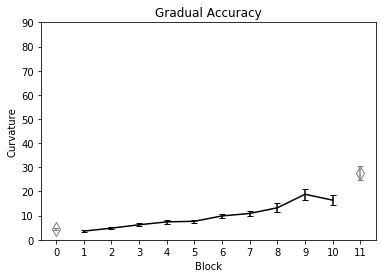

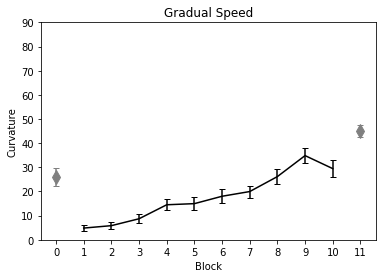

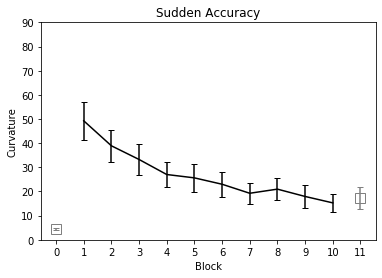

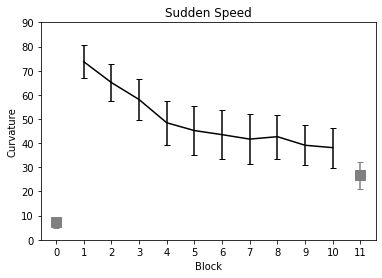

In [26]:
def plot_curvature_means(distances, path):
    #plt.rcParams[('figure.figsize')] = [8, 6]

    mean_errors = numpy.mean(distances, axis =2)
    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    plt.errorbar(0, numpy.mean(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[0], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[0], capsize=3, fmt = 'd', fillstyle = 'none', markersize = 10, color = [0.5, 0.5, 0.5])
    plt.errorbar(11, numpy.mean(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[11], capsize=3, fmt = 'd', fillstyle = 'none', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '14 Participants')
    plt.ylabel('Curvature')
    plt.xlabel('Block')
    plt.title('Gradual Accuracy')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])

    #y_lim_max = numpy.max((mean_errors)) + 5
    y_lim_max = 90
    plt.ylim((0, y_lim_max))
#    print(max(np.mean(quantiles[3::4][:, :, 3], axis = 0)[1:-1]) + 0.7)
    #plt.tight_layout()
    #plt.savefig(path+'learning_GA.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmedian(distances, axis = 2)[2::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[2::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    plt.errorbar(0, numpy.median(numpy.nanmean(distances, axis = 2)[2::4], axis = 0)[0], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[2::4], axis = 0)[0], capsize=3, fmt = 'd', fillstyle = 'full', markersize = 10, color = [0.5, 0.5, 0.5])
    plt.errorbar(11, numpy.median(numpy.nanmean(distances, axis = 2)[2::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[2::4], axis = 0)[11], capsize=3, fmt = 'd', fillstyle = 'full', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '15 Participants')
    plt.ylabel('Curvature')
    plt.xlabel('Block')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.title('Gradual Speed')
    plt.ylim(0, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_GS.png', dpi = 600)
    plt.show()
    #y_lim_max = 2200

    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    plt.errorbar(0, numpy.mean(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[0], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[0], capsize=3, fmt = 's', fillstyle = 'none', markersize = 10, color = [0.5, 0.5, 0.5])
    plt.errorbar(11, numpy.mean(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[11], capsize=3, fmt = 's', fillstyle = 'none', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '15 Participants')
    plt.ylabel('Curvature')
    plt.xlabel('Block')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.title('Sudden Accuracy')
    #y_lim_max = 10000

    plt.ylim(0, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_SA.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    plt.errorbar(0, numpy.mean(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[0], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[0], capsize=3, fmt = 's', fillstyle = 'full', markersize = 10, color = [0.5, 0.5, 0.5])
    plt.errorbar(11, numpy.mean(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[11], capsize=3, fmt = 's', fillstyle = 'full', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '14 Participants')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.ylabel('Curvature')
    plt.xlabel('Block')
    plt.title('Sudden Speed')
#    y_lim_max = 2600
    plt.ylim(0, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_SS.png', dpi = 600)
    plt.show()

plot_curvature_means(curvatures, "")


In [95]:
numpy.shape(numpy.ravel(numpy.nanmean(curvatures[0::4], axis = 0)[1:][:, :16]))

(176,)

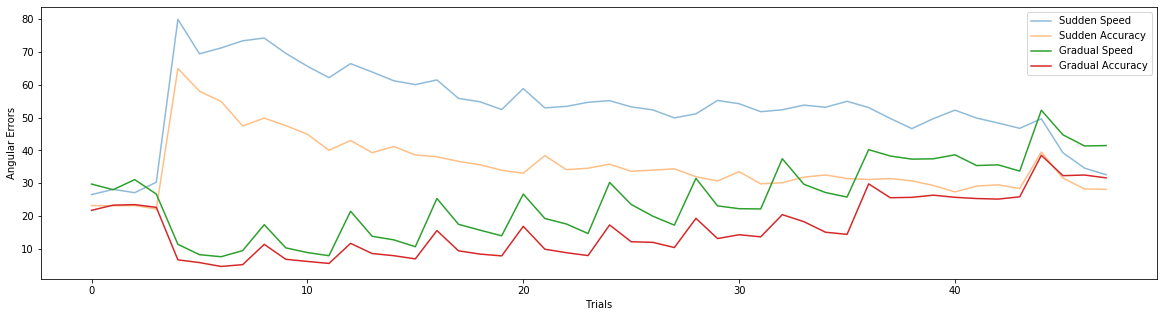

In [30]:
def plot_errors_trials(num_points, first_trial, last_trial, errors):
    plt.figure(figsize=(20, 5))
    plot_0, = plt.plot(numpy.nanmean(numpy.split(numpy.ravel(numpy.nanmean(curvatures[0::4], axis = 0)[:, first_trial:last_trial]), num_points), axis = 1), alpha = 0.5)
    plot_1, = plt.plot(numpy.nanmean(numpy.split(numpy.ravel(numpy.nanmean(curvatures[1::4], axis = 0)[:, first_trial:last_trial]), num_points), axis = 1), alpha = 0.5)
    plot_2, = plt.plot(numpy.nanmean(numpy.split(numpy.ravel(numpy.nanmean(curvatures[2::4], axis = 0)[:, first_trial:last_trial]), num_points), axis = 1))
    plot_3, = plt.plot(numpy.nanmean(numpy.split(numpy.ravel(numpy.nanmean(curvatures[3::4], axis = 0)[:, first_trial:last_trial]), num_points), axis = 1))

    plt.legend((plot_0, plot_1, plot_2, plot_3), ('Sudden Speed', 'Sudden Accuracy', 'Gradual Speed', 'Gradual Accuracy'))
    plt.xlabel('Trials')
    plt.ylabel('Angular Errors')
plot_errors_trials(48, 0, 64, curvatures)


In [ ]:
def plot_curvature(distances, path):
    #plt.rcParams[('figure.figsize')] = [8, 6]

    mean_errors = numpy.mean(distances, axis =2)
    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmean(distances, axis = 2)[3::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.median(distances, axis = 2)[3::4], axis = 0)[0], yerr = stat.sem(numpy.median(distances, axis = 2)[3::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.nanmean(distances, axis = 2)[3::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[3::4], axis = 0)[11], capsize=3, fmt = 'd', fillstyle = 'none', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '14 Participants')
    plt.ylabel('Curvature')
    plt.xlabel('Block')
    plt.title('Gradual Accuracy')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])

    #y_lim_max = numpy.max((mean_errors)) + 5
    y_lim_max = 90
    plt.ylim((0, y_lim_max))
#    print(max(np.mean(quantiles[3::4][:, :, 3], axis = 0)[1:-1]) + 0.7)
    #plt.tight_layout()
    #plt.savefig(path+'learning_GA.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmean(distances, axis = 2)[2::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[2::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.median(distances, axis = 2)[2::4], axis = 0)[0], yerr = stat.sem(numpy.median(distances, axis = 2)[2::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.nanmean(distances, axis = 2)[2::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[2::4], axis = 0)[11], capsize=3, fmt = 'd', fillstyle = 'full', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '15 Participants')
    plt.ylabel('Curvature')
    plt.xlabel('Block')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.title('Gradual Speed')
    plt.ylim(0, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_GS.png', dpi = 600)
    plt.show()
    #y_lim_max = 2200

    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmean(distances, axis = 2)[1::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.mean(distances, axis = 2)[1::4], axis = 0)[0], yerr = stat.sem(numpy.mean(distances, axis = 2)[1::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.nanmean(distances, axis = 2)[1::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[1::4], axis = 0)[11], capsize=3, fmt = 's', fillstyle = 'none', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '15 Participants')
    plt.ylabel('Curvature')
    plt.xlabel('Block')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.title('Sudden Accuracy')
    #y_lim_max = 10000

    plt.ylim(0, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_SA.png', dpi = 600)
    plt.show()

    plt.errorbar(range(1, 11), numpy.mean(numpy.nanmean(distances, axis = 2)[4::4], axis = 0)[1:-1], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[1:-1], capsize=3, color = [0, 0, 0])
    #plt.errorbar(0, numpy.mean(numpy.median(distances, axis = 2)[4::4], axis = 0)[0], yerr = stat.sem(numpy.median(distances, axis = 2)[4::4], axis = 0)[0], capsize=3, fmt = 's')
    plt.errorbar(11, numpy.mean(numpy.nanmean(distances, axis = 2)[4::4], axis = 0)[11], yerr = stat.sem(numpy.nanmedian(distances, axis = 2)[4::4], axis = 0)[11], capsize=3, fmt = 's', fillstyle = 'full', markersize = 10, color = [0.5, 0.5, 0.5])
    #plt.text(x=5, y = 80, s = '14 Participants')
    plt.xticks(range(12), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
    plt.ylabel('Curvature')
    plt.xlabel('Block')
    plt.title('Sudden Speed')
#    y_lim_max = 2600
    plt.ylim(0, y_lim_max)
    #plt.tight_layout()
    #plt.savefig(path+'learning_SS.png', dpi = 600)
    plt.show()

plot_curvature_means(curvatures, "")


In [ ]:
y = numpy.array([numpy.mean(numpy.mean(curvatures, axis = 2)[0::4], axis = 0)[11],
                 numpy.mean(numpy.mean(curvatures, axis = 2)[1::4], axis = 0)[11],
                 numpy.mean(numpy.mean(curvatures, axis = 2)[2::4], axis = 0)[11],
                 numpy.mean(numpy.mean(curvatures, axis = 2)[3::4], axis = 0)[11]])
y_sem = numpy.array([stat.sem(numpy.nanmean(curvatures, axis = 2)[0::4], axis = 0)[11],
                     stat.sem(numpy.nanmean(curvatures, axis = 2)[1::4], axis = 0)[11],
                     stat.sem(numpy.nanmean(curvatures, axis = 2)[2::4], axis = 0)[11],
                     stat.sem(numpy.nanmean(curvatures, axis = 2)[3::4], axis = 0)[11]])

plt.bar(0, y[0], yerr = y_sem[0])
plt.bar(1, y[1], yerr = y_sem[1])
plt.bar(2, y[2], yerr = y_sem[2])
plt.bar(3, y[3], yerr = y_sem[3])


#plt.xticks(['Sudden Speed', 'Sudden Accuracy', 'Gradual Speed', 'Gradual Accuracy'], rotation = 'vertical')

In [ ]:
#numpy.mean(numpy.mean(error_sum[1::4], axis = 2), axis = 0)
#stat.sem(numpy.mean(error_sum[1::4], axis = 2), axis = 0)
def plot_curvature_means_transfer(distances, text):
#    quantiles = get_quantile(total_times)
    xpos = [0, 1, 2, 3, 4]
    y = numpy.array([numpy.mean(numpy.nanmean(distances[1::4], axis = 2), axis = 0)[11],# - numpy.mean(numpy.median(distances[1::4], axis = 2), axis = 0)[10],
                  numpy.mean(numpy.nanmean(distances[0::4], axis = 2), axis = 0)[11], #- numpy.mean(numpy.median(distances[4::4], axis = 2), axis = 0)[10],
                  numpy.mean(numpy.nanmean(distances[3::4], axis = 2), axis = 0)[11], #- numpy.mean(numpy.median(distances[3::4], axis = 2), axis = 0)[10],
                  numpy.mean(numpy.nanmean(distances[2::4], axis = 2), axis = 0)[11]] #- numpy.mean(numpy.median(distances[2::4], axis = 2), axis = 0)[10]] 
                  )
    y_sem = numpy.array([stat.sem(numpy.nanmean(distances[1::4], axis = 2), axis = 0)[11], 
                    stat.sem(numpy.nanmean(distances[0::4], axis = 2), axis = 0)[11],
                    stat.sem(numpy.nanmean(distances[3::4], axis = 2), axis = 0)[11],
                    stat.sem(numpy.nanmean(distances[2::4], axis = 2), axis = 0)[11]])
    #print (y_sem[0])
    #y_sem = numpy.array([0, 0, 0, 0])
    plt.bar(0, y[0], yerr = y_sem[0], capsize = 3, fill = False)
    plt.bar(1, y[1], yerr = y_sem[1], capsize = 3, color = [0.5, 0.5, 0.5])
    plt.bar(2, y[2], yerr = y_sem[2], capsize = 3, hatch = '\\', fill = False)
    plt.bar(3, y[3], yerr = y_sem[3], capsize = 3, hatch = '\\', color = [0.5, 0.5, 0.5])

#    handles = plt.bar(range(4), y, yerr = y_sem, capsize = 3, color = ['Blue', 'Green', 'Blue', 'Green'], alpha = [1, 0.5, 0.5, 1])
    plt.xticks([0, 1, 2, 3], ['Sudden \n Accuracy', 'Sudden \n Speed', 'Gradual \n Accuracy', 'Gradual \nSpeed'], rotation = 'vertical')
    plt.ylabel('Curvatures')
    plt.xlabel('Condition')
    #plt.legend([handles[0], handles[1]], ['Speed', 'Accuracy'])
    plt.title(text)
    plt.ylim(0, 45)
    print (y)
#numpy.shape(numpy.mean(error_sum[1::4], axis = 0))
plot_curvature_means_transfer(curvatures, 'Transfer')

In [ ]:
curvatures[1::4]

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
ols()

In [ ]:
stat.f_oneway(numpy.mean(curvatures[0::4, :, :], axis = 2)[:, 11], numpy.mean(curvatures[1::4, :, :], axis = 2)[:, 11], numpy.mean(curvatures[2::4, :, :], axis = 2)[:, 11], numpy.mean(curvatures[3::4, :, :], axis = 2)[:, 11])

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({"Emphasis": numpy.tile(["Speed", "Accuracy"], 30),
                   "Rotation": numpy.tile(["Sudden", "Sudden", "Gradual", "Gradual"], 15),
                   "Curvature": numpy.nanmean(curvatures[:, :, :], axis = 2)[:, 11]})

In [ ]:
d_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Sudden_Speed', 'Sudden_Accuracy', 'Gradual_Speed', 'Gradual_Accuracy'])

In [ ]:
model = ols('Curvature ~ C(Emphasis)*C(Rotation)', data=df).fit()

In [ ]:
aov_table = sm.stats.anova_lm(model)
print(aov_table)

In [ ]:
model.summary()

In [ ]:
aov_table

In [ ]:
df.boxplot('Curvature', by='Rotation', figsize=(8, 6))

In [ ]:
import statsmodels.formula.api as smf
md = smf.mixedlm('Curvature ~ C(Emphasis)*C(Rotation)', data=df, groups = df['Emphasis'])
mdf = md.fit()


In [ ]:
mdf.summary()

In [ ]:
model_lm = sm.OLS(numpy.ravel(curvatures[0, 11, :]),numpy.array(range(64))).fit()

In [ ]:
model_lm.summary()

In [ ]:
plt.plot(range(64), numpy.mean(curvatures[3::4, :, :], axis = 0)[10])


In [36]:
def calc_curvature_raw(data, block, trial, percentage_trajectory):
    traj = scipy.io.loadmat('data/data{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    trajx, trajy = traj['x'][0][trial][0], traj['y'][0][trial][0]
    targetx, targety = trajx[-1], trajy[-1]
    partial_trajx, partial_trajy = get_partial_traj(data, block, trial, percentage_trajectory)
    angles = list()
    for i in range(len(partial_trajx[:-1])):
        #print (trajx[i], trajy[i])
        angles.append(calc_angle(numpy.array([partial_trajx[i], partial_trajy[i]]), numpy.array([partial_trajx[i+1], partial_trajy[i+1]]), numpy.array([trajx[-1], trajy[-1]])))
    return angles

In [37]:
raw_curvatures = numpy.zeros((60, 12, 64), dtype = object)
for data in range(60):
    for block in range(12):
        for trial in range(64):
            raw_curvatures[data][block][trial] = calc_curvature_raw(data+1000, block, trial, 1)
    if data%10 == 0:
        print (data)

C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


0
10
20
30
40
50


In [16]:
def plot_distributions(perc_trajectory):
    raw_curvatures = numpy.zeros((60, 11, 64), dtype = object)
    for data in range(60):
        for block in range(11):
            for trial in range(64):
                raw_curvatures[data][block][trial] = calc_curvature_raw(data+1000, block, trial, perc_trajectory)
        if data%10 == 0:
            print (data)
    
    fig, ax = plt.subplots(2, 2, sharex = True, sharey = True)
    ax[0, 0].hist(numpy.hstack(numpy.ravel(raw_curvatures[0::4])))
    ax[0, 0].set_title('Sudden Speed')
    ax[0, 1].hist(numpy.hstack(numpy.ravel(raw_curvatures[1::4])))
    ax[0, 1].set_title('Sudden Accuracy')
    ax[1, 0].hist(numpy.hstack(numpy.ravel(raw_curvatures[2::4])))
    ax[1, 0].set_title('Gradual Speed')
    ax[1, 1].hist(numpy.hstack(numpy.ravel(raw_curvatures[3::4])))
    ax[1, 1].set_title('Gradual Accuracy')
    title_text = str(perc_trajectory*100) + "% of the trajectory"
    fig.suptitle(title_text)
    #plt.grid(False)
    #plt.tick_params(labelcolor="none", bottom=False, left=False)
    plt.xlabel('Curvature Errors in degrees')
    plt.ylabel('Frequencies')

C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


0


C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """


10
20
30
40
50


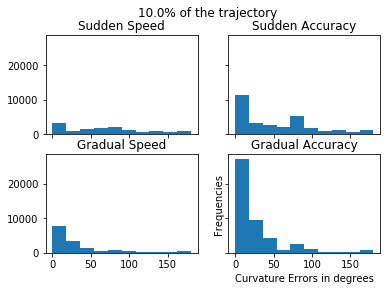

In [17]:
plot_distributions(0.1)

In [277]:
##### numpy.quantile(range(len(raw_curvatures[1][1][1])), [0.1, 0.3, 0.5, 0.7, 0.9])
raw_curvatures[1][1][1][120]
numpy.take(raw_curvatures[1][1][1], [24.1, 72.3, 120.5])

array([105.19240901,  52.12501635,  63.66231183])

## Dist Analyses with Medians

In [39]:
quantile_curvatures = numpy.zeros((60, 12, 64, 5))
for data in range(60):
    for block in range(12):
        for trial in range(64):
            try:
                quantile_index = numpy.quantile(range(len(raw_curvatures[data][block][trial])), [0.1, 0.3, 0.5, 0.7, 0.9]).tolist()
                quantile_curvatures[data][block][trial] = numpy.take(raw_curvatures[data][block][trial], quantile_index)
            except:
                print('Some error')

Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error
Some error

## Dist Analysis with Means

In [40]:
quantile_curvatures_means = numpy.zeros((60, 12, 64, 5))
for data in range(60):
    for block in range(12):
        for trial in range(64):
            try:
                quantile_index = numpy.quantile(range(len(raw_curvatures[data][block][trial])), [0.2, 0.4, 0.6, 0.8, 1]).tolist()
                quantile_curvatures_means[data][block][trial] = numpy.array([numpy.nanmean(raw_curvatures[data][block][trial][0:int(quantile_index[0])]), 
                                                                             numpy.nanmean(raw_curvatures[data][block][trial][int(quantile_index[0]):int(quantile_index[1])]), 
                                                                             numpy.nanmean(raw_curvatures[data][block][trial][int(quantile_index[1]):int(quantile_index[2])]),
                                                                             numpy.nanmean(raw_curvatures[data][block][trial][int(quantile_index[2]):int(quantile_index[3])]), 
                                                                             numpy.nanmean(raw_curvatures[data][block][trial][int(quantile_index[3]):int(quantile_index[4])])])
            except:
                print('Some Error')


C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


Some Error


C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error
Some Error

In [41]:
quantile_curvatures_means[5][2][:32]

array([[  7.25723129,   7.89879504,  11.78018992,   8.0269385 ,
          6.72183201],
       [ 11.39347434,   9.48449036,   5.33067629,   3.35498624,
          2.58665775],
       [171.87102229, 160.39648972,          nan,  60.09339125,
          7.59652155],
       [  3.51105922,   4.73921822,   5.16257206,   4.4695911 ,
          4.25939148],
       [ 83.38398315,  80.26493666,  81.27143666,  72.10887336,
         39.00746293],
       [  6.02106844,   3.37856236,   2.68908076,   5.12081416,
          3.98464743],
       [  6.52725673,   5.98363939,   8.93214358,   5.48378961,
          5.66849726],
       [  7.03126216,   5.19231654,   3.78409817,   5.26224562,
          5.37910076],
       [  4.64249729,   4.53943104,  10.25147557,  14.99842387,
         30.41477352],
       [  8.65771559,  24.71699516,  74.26949859, 128.78516246,
        153.34023115],
       [ 22.85403047,  23.14077397,  31.02892057,  61.9194449 ,
         81.36823418],
       [  8.62443343,  11.51655657,  19.790

In [42]:
def plot_curv_dist(block, quantile_curvatures, fist_traj, last_traj):
    y = numpy.array([numpy.nanmean(numpy.nanmean(quantile_curvatures[0::4, :, fist_traj:last_traj], axis = 2), axis = 0)[block],
                     numpy.nanmean(numpy.nanmean(quantile_curvatures[1::4, :, fist_traj:last_traj], axis = 2), axis = 0)[block],
                     numpy.nanmean(numpy.nanmean(quantile_curvatures[2::4, :, fist_traj:last_traj], axis = 2), axis = 0)[block],
                     numpy.nanmean(numpy.nanmean(quantile_curvatures[3::4, :, fist_traj:last_traj], axis = 2), axis = 0)[block]])
    y_err = numpy.array([stat.sem(numpy.nanmean(quantile_curvatures[0::4, :, fist_traj:last_traj], axis = 2), axis = 0)[block],
                       stat.sem(numpy.nanmean(quantile_curvatures[1::4, :, fist_traj:last_traj], axis = 2), axis = 0)[block],
                       stat.sem(numpy.nanmean(quantile_curvatures[2::4, :, fist_traj:last_traj], axis = 2), axis = 0)[block],
                       stat.sem(numpy.nanmean(quantile_curvatures[3::4, :, fist_traj:last_traj], axis = 2), axis = 0)[block]])
    print (y[1])
    plot_0 = plt.errorbar(range(5), y[0], y_err[0], capsize = 3)
    plot_1 = plt.errorbar(range(5), y[1], y_err[1], capsize = 3)
    plot_2 = plt.errorbar(range(5), y[2], y_err[2], capsize = 3)
    plot_3 = plt.errorbar(range(5), y[3], y_err[3], capsize = 3)

    plt.legend((plot_0, plot_1, plot_2, plot_3), ('Sudden Speed', 'Sudden Accuracy', 'Gradual Accuracy', 'Gradual Speed'))
    title = 'Block: ' + str(block)
    plt.title(title)
    plt.xlabel('Quantile points')
    plt.ylabel('Angular errror')

[26.12535719 25.3884783  26.2745213  24.16556444 18.02243538]


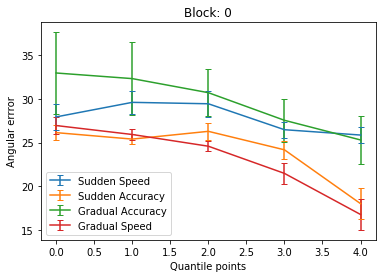

In [47]:
plot_curv_dist(0, quantile_curvatures, 0, 32)

In [ ]:
## plot_curv_dist(11, quantile_curvatures)

In [171]:
numpy.quantile(range(len(raw_curvatures[data][block][trial])), [0.1, 0.3, 0.5, 0.7, 0.9])

array([ 3.,  9., 15., 21., 27.])

In [40]:
numpy.nanmean(numpy.nanmean(quantile_curvatures[0::4, :, :16], axis = 2), axis = 0)[block]

array([38.31014677, 51.05531969, 59.38756186, 50.08345444, 45.54493824])

(15, 12, 16, 5)

Value = (1 - alpha)*(1/error) + (alpha)*(1/Total time)